In [41]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

def plot_sir(exp_name, beta, gamma):
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["font.size"] = 12.0
    plt.rcParams["figure.autolayout"] = True

    base_path = f"../../src/InfoWave.MonoGame/bin/Debug/net7.0/{exp_name}/"
    folders = os.listdir(base_path)
    dfs = []
    for filename in folders:
        path = os.path.join(base_path, filename)
        df = pd.read_csv(path)
        dfs.append(df)
    combined_df = pd.concat(dfs)
    grouped_df = combined_df.groupby('t').agg({'s': ['min', 'max', 'median'], 'i': ['min', 'max', 'median'], 'r': ['min', 'max', 'median']})
    grouped_df.columns = ['s_min', 's_max', 's_median', 'i_min', 'i_max', 'i_median', 'r_min', 'r_max', 'r_median']

    # Parameters for the SIR model
    # beta = 0.125   # infection rate
    # gamma = 0.05  # recovery rate
    N = 40     # total population

    # Calculate the reference SIR model
    def sir_model(y, t):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    # Time points for the SIR model
    t_model = grouped_df.index.values

    # Initial conditions for the SIR model
    y0 = (N, 1, 0)  # (S0, I0, R0)

    # Integrate the SIR model equations
    from scipy.integrate import odeint
    sol = odeint(sir_model, y0, t_model)

    plt.figure(figsize=(10, 6))

    # Define color and alpha values
    color = 'steelblue'
    area_alpha = 0.1
    point_alpha = 0.3

    # Plotting susceptible
    plt.fill_between(grouped_df.index, grouped_df['s_min'], grouped_df['s_max'], color='g', alpha=area_alpha)
    plt.plot(grouped_df.index, grouped_df['s_median'], marker='o', color='g', alpha=point_alpha, label='Susceptible')

    # Plotting infected
    plt.fill_between(grouped_df.index, grouped_df['i_min'], grouped_df['i_max'], color='r', alpha=area_alpha)
    plt.plot(grouped_df.index, grouped_df['i_median'], marker='o', color='r', alpha=point_alpha, label='Infected')

    # Plotting recovered
    plt.fill_between(grouped_df.index, grouped_df['r_min'], grouped_df['r_max'], color='b', alpha=area_alpha)
    plt.plot(grouped_df.index, grouped_df['r_median'], marker='o', color='b', alpha=point_alpha, label='Recovered')

    # Plotting the reference SIR model
    plt.plot(t_model, sol[:, 0], label='SIR Model (Susceptible)', linestyle='--', color='g')
    plt.plot(t_model, sol[:, 1], label='SIR Model (Infected)', linestyle='--', color='r')
    plt.plot(t_model, sol[:, 2], label='SIR Model (Recovered)', linestyle='--', color='b')

    plt.xlabel('Time Step')
    plt.ylabel('Population Size')
    plt.title(f'Min, Max, and Median of {len(folders)} Runs (SIR parameters: beta={beta}, gamma={gamma}, N={N})')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{exp_name}.png", format="png", transparent=True, bbox_inches="tight")

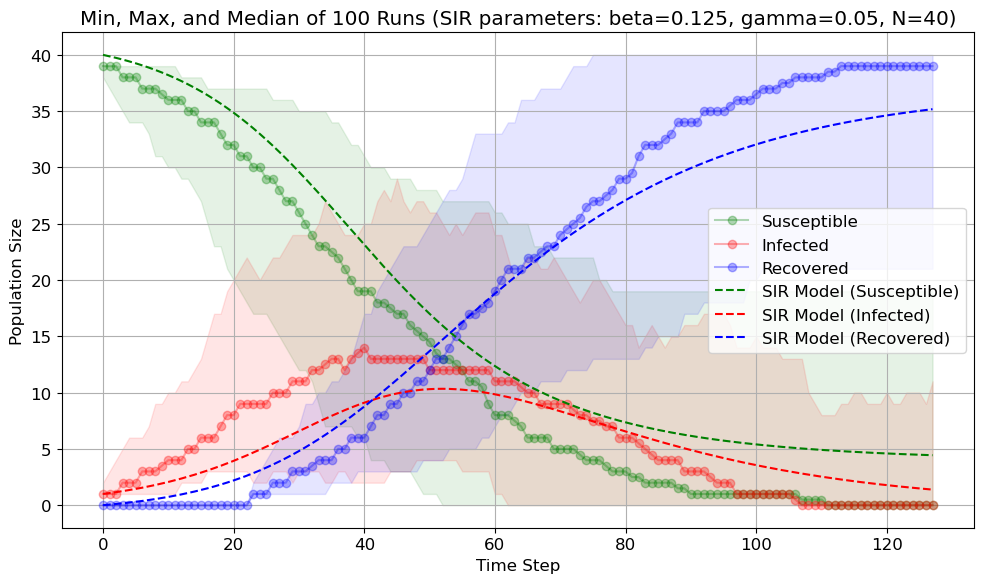

In [42]:
plot_sir("experiment1", 0.125, 0.05)

In [59]:
from PIL import Image
import os
import re

In [70]:
pattern = re.compile("sir_\d+\.png")
paths = [
    "../../../master-thesis/images/chapter2/sir0",
    "../../../master-thesis/images/chapter2/sir2",
    "../../../master-thesis/images/chapter2/sir3"
]
for path in paths:
    for file in os.listdir(path):
        if not pattern.match(file): continue
        im = Image.open(f"{path}/{file}")
        cropped = im.crop((1, 1, 1537, 769))
        cropped.save(f"{path}/{file}")

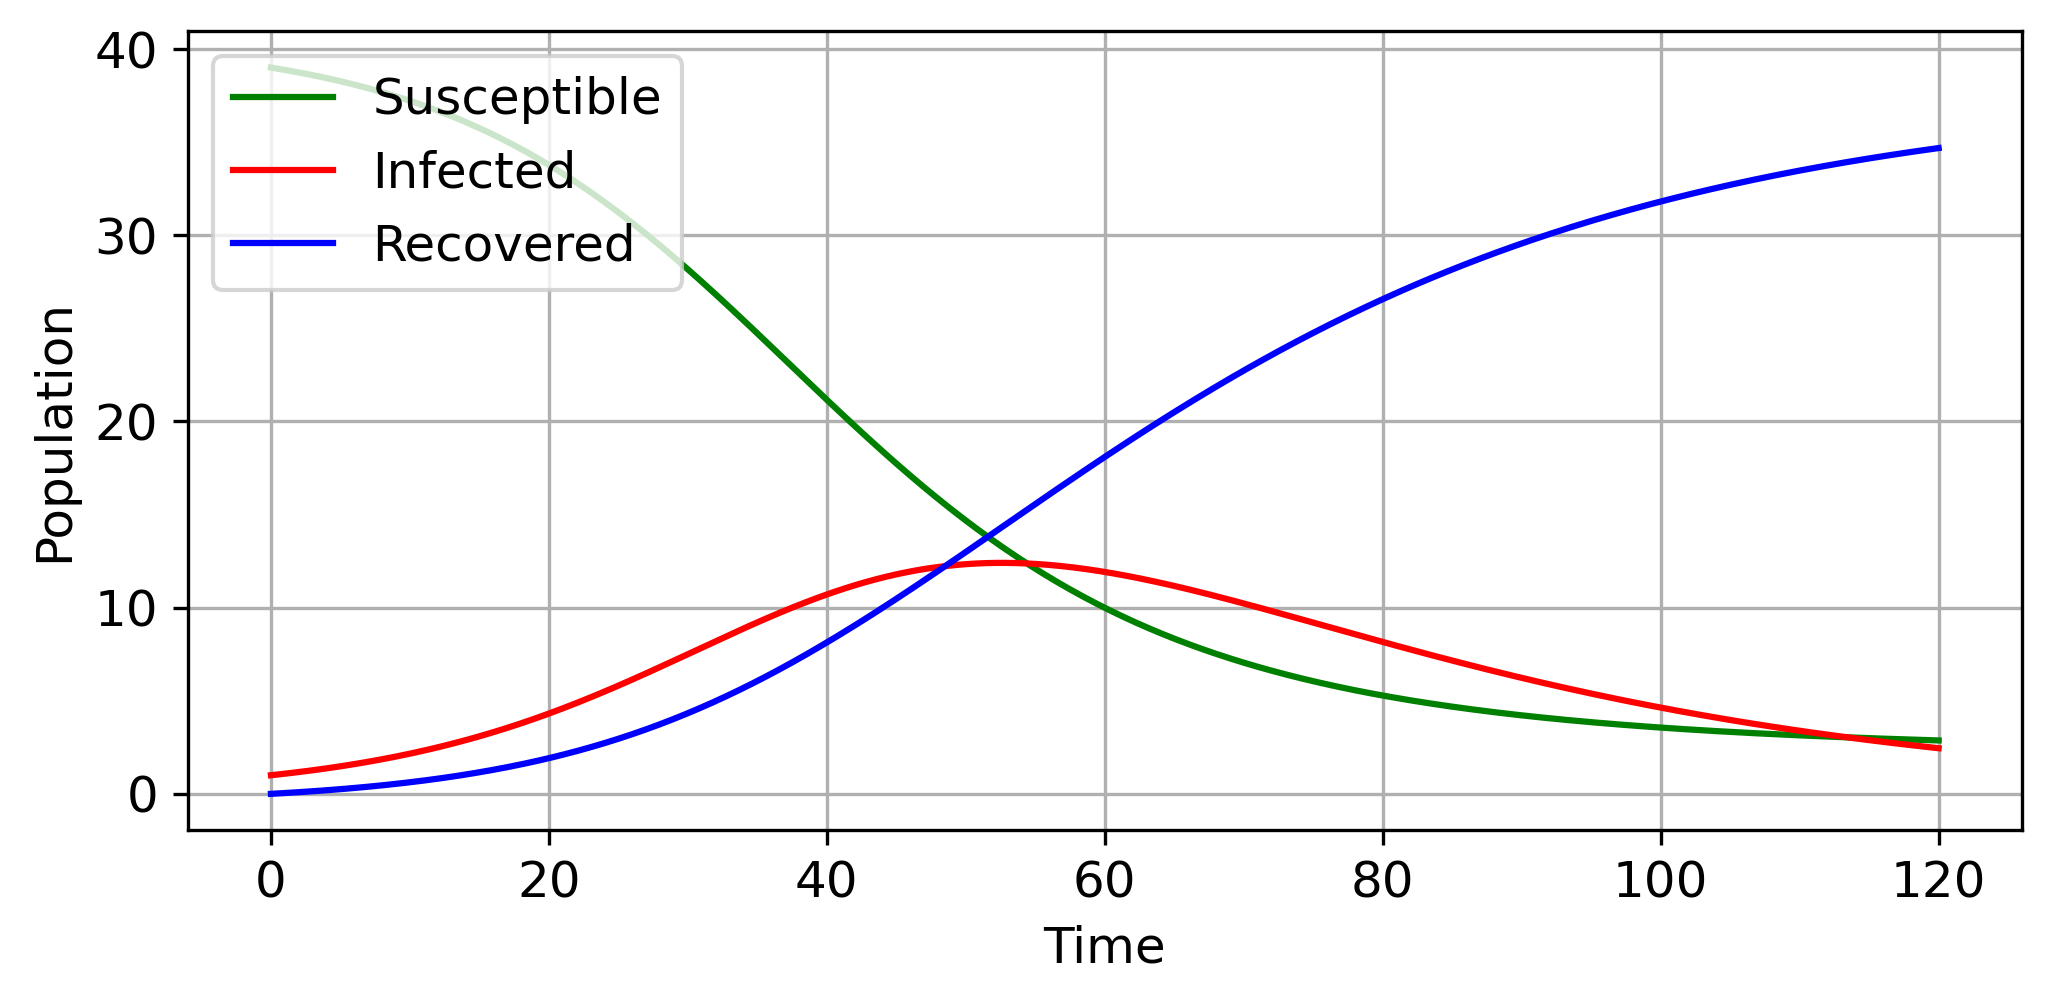

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.03  # Infection rate
gamma = 0.01  # Recovery rate
N = 40  # Total population size

# Initial conditions
S0 = N - 1  # Initial number of susceptible individuals
I0 = 1  # Initial number of infected individuals
R0 = 0  # Initial number of recovered individuals

# Time vector
t = np.linspace(0, 120, 500)  # Time span

# Function for solving the SIR model equations
def solve_sir_model(S, I, R, beta, gamma):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solve the SIR model equations
S, I, R = [S0], [I0], [R0]
for i in range(1, len(t)):
    dSdt, dIdt, dRdt = solve_sir_model(S[i-1], I[i-1], R[i-1], beta, gamma)
    S.append(S[i-1] + dSdt)
    I.append(I[i-1] + dIdt)
    R.append(R[i-1] + dRdt)

# Plotting
fig = plt.figure(dpi=300)
plt.plot(t, S, label='Susceptible', c='g')
plt.plot(t, I, label='Infected', c='r')
plt.plot(t, R, label='Recovered', c='b')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("sir_1.png", format="png", transparent=True, bbox_inches="tight")
